<a href="https://colab.research.google.com/github/KryssyCo/DS-Unit-2-Applied-Modeling/blob/master/Krista_Shepard_DSPT_2_U2S7M2_Assignment_2_Applied_Modeling_Caterpillar_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [X] Plot the distribution of your target. 
    - Classification problem: Are your classes imbalanced? Then, don't use just accuracy.
   ** - Regression problem: Is your target skewed? If so, let's discuss in Slack.**
- [X] Continue to clean and explore your data. Make exploratory visualizations.
- [X] Fit a model. Does it beat your baseline?
- [X] Try xgboost.
- [X] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

### I chose a new data set from kaggle to work with, because I had worked with it the last time we covered this material in DS5 and I didn't understand it then. Will be fun to get a look at it with fresh, healthy, more educated eyes.

In [50]:
!wget https://github.com/KryssyCo/DS-Unit-2-Applied-Modeling/blob/master/caterpillar-tube-pricing.zip?raw=true

--2019-10-11 03:23:54--  https://github.com/KryssyCo/DS-Unit-2-Applied-Modeling/blob/master/caterpillar-tube-pricing.zip?raw=true
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/KryssyCo/DS-Unit-2-Applied-Modeling/raw/master/caterpillar-tube-pricing.zip [following]
--2019-10-11 03:23:54--  https://github.com/KryssyCo/DS-Unit-2-Applied-Modeling/raw/master/caterpillar-tube-pricing.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/KryssyCo/DS-Unit-2-Applied-Modeling/master/caterpillar-tube-pricing.zip [following]
--2019-10-11 03:23:54--  https://raw.githubusercontent.com/KryssyCo/DS-Unit-2-Applied-Modeling/master/caterpillar-tube-pricing.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.1

In [51]:
!ls *.zip

data.zip


In [52]:
!unzip /content/caterpillar-tube-pricing.zip?raw=true

Archive:  /content/caterpillar-tube-pricing.zip?raw=true
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_submission.csv   
  inflating: data.zip                


In [53]:
!unzip data.zip

Archive:  data.zip
replace competition_data/bill_of_materials.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: competition_data/bill_of_materials.csv  
  inflating: competition_data/comp_adaptor.csv  
  inflating: competition_data/comp_boss.csv  
  inflating: competition_data/comp_elbow.csv  
  inflating: competition_data/comp_float.csv  
  inflating: competition_data/comp_hfl.csv  
  inflating: competition_data/comp_nut.csv  
  inflating: competition_data/comp_other.csv  
  inflating: competition_data/comp_sleeve.csv  
  inflating: competition_data/comp_straight.csv  
  inflating: competition_data/comp_tee.csv  
  inflating: competition_data/comp_threaded.csv  
  inflating: competition_data/components.csv  
  inflating: competition_data/specs.csv  
  inflating: competition_data/test_set.csv  
  inflating: competition_data/train_set.csv  
  inflating: competition_data/tube.csv  
  inflating: competition_data/tube_end_form.csv  
  inflating: competition_data/type_component.csv 

In [0]:
from glob import glob
import pandas as pd

In [68]:
for path in glob('competition_data/*.csv'):
  df = pd.read_csv(path)
  print(path, df.shape)

competition_data/comp_straight.csv (361, 12)
competition_data/comp_nut.csv (65, 11)
competition_data/comp_elbow.csv (178, 16)
competition_data/comp_threaded.csv (194, 32)
competition_data/tube_end_form.csv (27, 2)
competition_data/comp_tee.csv (4, 14)
competition_data/specs.csv (21198, 11)
competition_data/bill_of_materials.csv (21198, 17)
competition_data/comp_boss.csv (147, 15)
competition_data/comp_other.csv (1001, 3)
competition_data/train_set.csv (30213, 8)
competition_data/comp_sleeve.csv (50, 10)
competition_data/comp_adaptor.csv (25, 20)
competition_data/test_set.csv (30235, 8)
competition_data/comp_float.csv (16, 7)
competition_data/tube.csv (21198, 16)
competition_data/components.csv (2048, 3)
competition_data/type_component.csv (29, 2)
competition_data/type_connection.csv (14, 2)
competition_data/type_end_form.csv (8, 2)
competition_data/comp_hfl.csv (6, 9)


In [69]:
# Import category encoders
!pip install category_encoders

In [0]:
# Import libraries
import category_encoders as ce 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error


In [71]:
!pip install pandas_profiling

In [72]:
import pandas_profiling as pp
df = pd.read_csv(path)
pp.ProfileReport(df)

Number of variables,9
Number of observations,6
Total Missing (%),0.0%
Total size in memory,512.0 B
Average record size in memory,85.3 B
Numeric,1
Categorical,3
Boolean,0
Date,0
Text (Unique),2
Rejected,3


In [0]:
# Define 'rmsle' and rmse function (function from previous notebook)

def rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))
def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

## [X] Plot the distribution of your target. 

- Classification problem: Are your classes imbalanced? Then, don't use just accuracy.

- **- Regression problem: Is your target skewed? YES!**

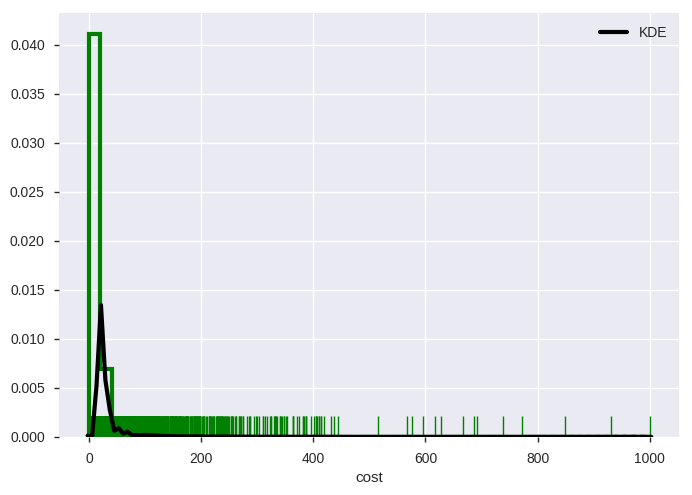

In [73]:
df = pd.read_csv('competition_data/train_set.csv')

# Seaborn Histogram

ax = sns.distplot(df['cost'], rug=True, rug_kws={"color": "g"}, 
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"}, 
                  hist_kws={"histtype": "step", "linewidth": 3,  "alpha": 1, "color": "g"})

# This initial data is highly skewed. I think removing ouliers will make a 
# significant difference.

## [X] Continue to clean and explore your data. Make exploratory visualizations.

Clean and organize data.

In [0]:
# Exploratory data is in a "kitchen sink notebook"
# The following is the feature engineering and merges I think will be 
# beneficial to my model.

In [0]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

def wrangle(X):
    X = X.copy()
    
#     Engineer the features
    X['quote_date'] = pd.to_datetime(X['quote_date'], infer_datetime_format=True)
    X['quote_date_year'] = X['quote_date'].dt.year
    X['quote_date_month'] = X['quote_date'].dt.month
    X=X.drop(columns='quote_date')
    
#     merge tube data
    tube = pd.read_csv('competition_data/tube.csv')
    X = X.merge(tube, how='left')
    
   # Engineer features from bill_of_materials
    materials = pd.read_csv('competition_data/bill_of_materials.csv')
    
    materials['components_total'] = (materials['quantity_1'].fillna(0) + 
                                     materials['quantity_2'].fillna(0) + 
                                     materials['quantity_3'].fillna(0) + 
                                     materials['quantity_4'].fillna(0) + 
                                     materials['quantity_5'].fillna(0) + 
                                     materials['quantity_6'].fillna(0) + 
                                     materials['quantity_7'].fillna(0) + 
                                     materials['quantity_8'].fillna(0))

    materials['components_distinct'] = (materials['component_id_1'].notnull().astype(int) + 
                                        materials['component_id_2'].notnull().astype(int) + 
                                        materials['component_id_3'].notnull().astype(int) + 
                                        materials['component_id_4'].notnull().astype(int) + 
                                        materials['component_id_5'].notnull().astype(int) + 
                                        materials['component_id_6'].notnull().astype(int) + 
                                        materials['component_id_7'].notnull().astype(int) + 
                                        materials['component_id_8'].notnull().astype(int))
    
#     merge selected features from bill_of_materials
    features = ['tube_assembly_id', 'component_id_1', 'components_total', 'components_distinct']
    X = X.merge(materials[features], how='left')
    
#     get component type id
    components = pd.read_csv('competition_data/components.csv')
    components = components.rename(columns={'component_id': 'component_id_1'})
    features = ['component_id_1', 'component_type_id']
    X = X.merge(components[features], how='left')
    
#     count the number of specs for the tube assembly
    specs = pd.read_csv('competition_data/specs.csv')
    specs['specs_total'] = specs.drop(columns=['tube_assembly_id']).count(axis=1)
    features = ['tube_assembly_id', 'specs_total', 'spec1']
    X = X.merge(specs[features], how='left')
  
    #     drop assembly_id because the goal is to predict unk assemblies
    X = X.drop(columns='tube_assembly_id')
    
    return X
  
#   read the data
trainval = pd.read_csv('competition_data/train_set.csv')
test = pd.read_csv('competition_data/test_set.csv')

# split into train and val sets
trainval_tube_assemblies = trainval['tube_assembly_id'].unique()
train_tube_assemblies, val_tube_assemblies = train_test_split(
    trainval_tube_assemblies, random_state=42)
train = trainval[trainval.tube_assembly_id.isin(train_tube_assemblies)]
val = trainval[trainval.tube_assembly_id.isin(val_tube_assemblies)]

# wrangle the sets
train = wrangle(train)
val= wrangle(val)
test= wrangle(test)

# matrix vector split
target = 'cost'
X_train = train.drop(columns=target)
X_val = val.drop(columns=target)
X_test = test.drop(columns='id')
y_train = train[target]
y_val = val[target]
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

### - [X] Try xgboost.

### - [X] Fit a model. Does it beat your baseline? 

With cross_validation it definitely beats my baseline:
RMSLE 0.37245341814107336

With Gradient Boosting:

RMSLE 0.08290232812775335

rmse 0.27945958908945456


My baselines from assignment one were :

RMSLE, Mean Baseline: 0.9418101276064408

RMSE, Mean Baseline: 31.56520559484162

R^2, Mean Baseline: -4.701447715138585e-06


In [102]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(random_state=42)
)

param_distributions = {
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_features': uniform(), 
    'randomforestregressor__min_samples_leaf':  [1, 10, 100]
}

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_squared_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train_log);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.0s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.0s finished


In [104]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation RMSLE', np.sqrt(-search.best_score_))

Best hyperparameters {'randomforestregressor__max_features': 0.1646432219231454, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__n_estimators': 223}
Cross-validation RMSLE 0.37245341814107336


In [80]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

eval_set = [(X_train_encoded, y_train_log), 
            (X_val_encoded, y_val_log)]

model = XGBRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train_encoded, y_train_log, 
          early_stopping_rounds=10, eval_metric='rmse', 
          eval_set=eval_set)



[03:29:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.71924	validation_1-rmse:1.70846
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.56516	validation_1-rmse:1.55498
[2]	validation_0-rmse:1.42779	validation_1-rmse:1.41846
[3]	validation_0-rmse:1.30338	validation_1-rmse:1.2943
[4]	validation_0-rmse:1.19168	validation_1-rmse:1.18295
[5]	validation_0-rmse:1.09322	validation_1-rmse:1.08553


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[6]	validation_0-rmse:1.0052	validation_1-rmse:0.997831
[7]	validation_0-rmse:0.927625	validation_1-rmse:0.922043
[8]	validation_0-rmse:0.859916	validation_1-rmse:0.857021
[9]	validation_0-rmse:0.799929	validation_1-rmse:0.798434
[10]	validation_0-rmse:0.747475	validation_1-rmse:0.747741
[11]	validation_0-rmse:0.700332	validation_1-rmse:0.700594
[12]	validation_0-rmse:0.660555	validation_1-rmse:0.662626
[13]	validation_0-rmse:0.623149	validation_1-rmse:0.625612
[14]	validation_0-rmse:0.592345	validation_1-rmse:0.5964
[15]	validation_0-rmse:0.563783	validation_1-rmse:0.568364
[16]	validation_0-rmse:0.540559	validation_1-rmse:0.546317
[17]	validation_0-rmse:0.519686	validation_1-rmse:0.5262
[18]	validation_0-rmse:0.501662	validation_1-rmse:0.509163
[19]	validation_0-rmse:0.483726	validation_1-rmse:0.492813
[20]	validation_0-rmse:0.469636	validation_1-rmse:0.478782
[21]	validation_0-rmse:0.457695	validation_1-rmse:0.468263
[22]	validation_0-rmse:0.447907	validation_1-rmse:0.458799
[23]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [106]:
# validate
y_pred_log = model.predict(X_val_encoded)
print('Validation Error:rmse', rmse(y_val_log, y_pred_log))

y_pred_log = model.predict(X_test_encoded)
y_pred = np.expm1(y_pred_log)

Validation Error:rmse 0.27945958908945456


In [105]:
# validate
y_pred_log = model.predict(X_val_encoded)
print('Validation Error:RMSLE', rmsle(y_val_log, y_pred_log))

y_pred_log = model.predict(X_test_encoded)
y_pred = np.expm1(y_pred_log)

Validation Error:RMSLE 0.08290232812775335


In [132]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.607923188665867


### - [X] Get your model's permutation importances.

In [107]:
print('Shape before removing features:', X_train.shape)

Shape before removing features: (22628, 28)


In [108]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
model = XGBRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train_encoded, y_train_log)
y_pred_log = model.predict(X_val_encoded)
print(f'Validation RMSLE', rmse(y_val_log, y_pred_log))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:09:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation RMSLE 0.2700581596577784


In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [117]:
!pip install pdpbox

     |████████████████████████████████| 57.7MB 45.7MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=dd37a472d256ed90a0b3cc08c7ceb3c990d7d4fe9bb4437a2e389025eda59d59
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

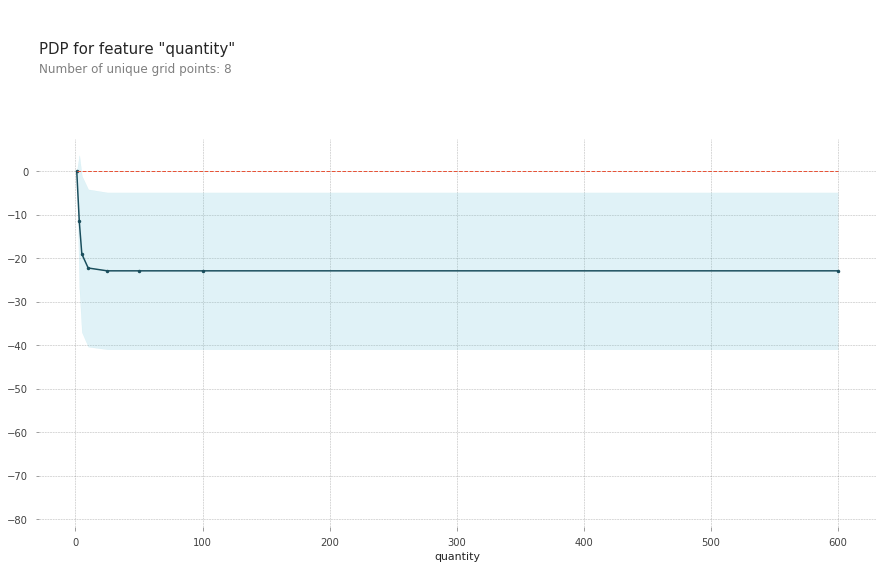

In [131]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'quantity'

isolated = pdp_isolate(
    model = gb,
    dataset = X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

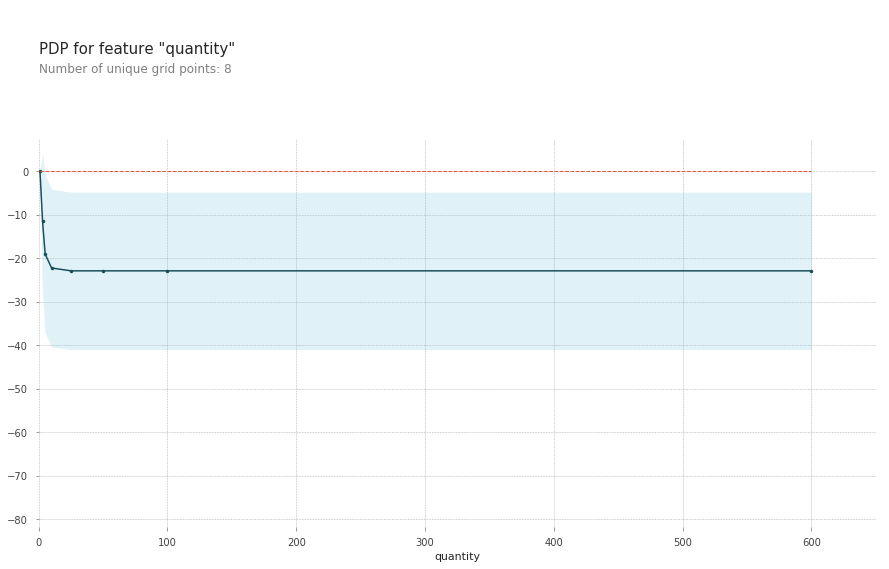

In [136]:
pdp_plot(isolated, feature_name=feature)
plt.xlim(0,650);

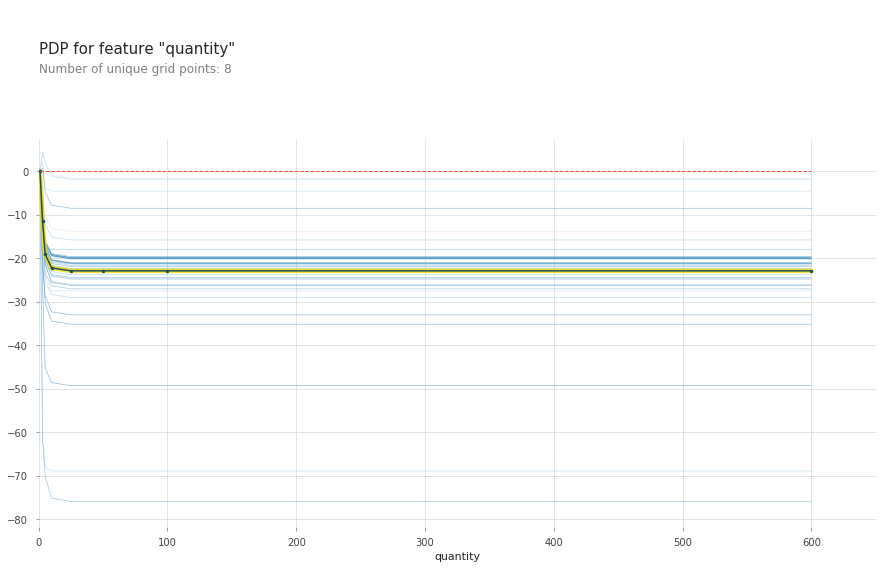

In [139]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=50)
plt.xlim(0,650);

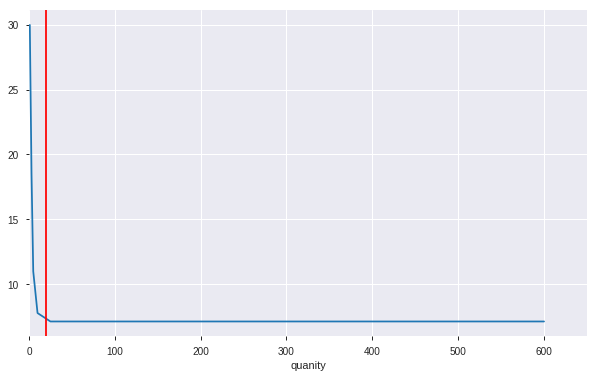

In [144]:
grid = isolated.feature_grids
pdp = isolated.pdp

plt.figure(figsize=(10,6))
plt.plot(grid, pdp)

plt.xlabel('quanity')

plt.xlim(0,650)
plt.axvline(20,color='r')
plt.show();

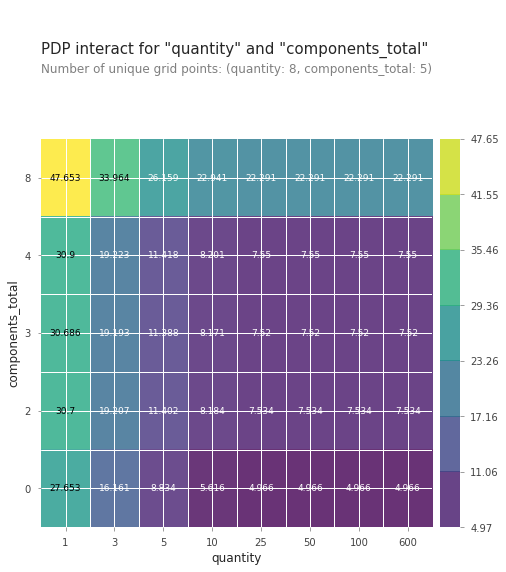

In [153]:
# TODO

from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['quantity', 'components_total']

interaction = pdp_interact(
  model=gb,
  dataset=X_val,
  model_features=X_val.columns,
  features=features 
)

pdp_interact_plot(interaction, feature_names=features, plot_type='grid' );

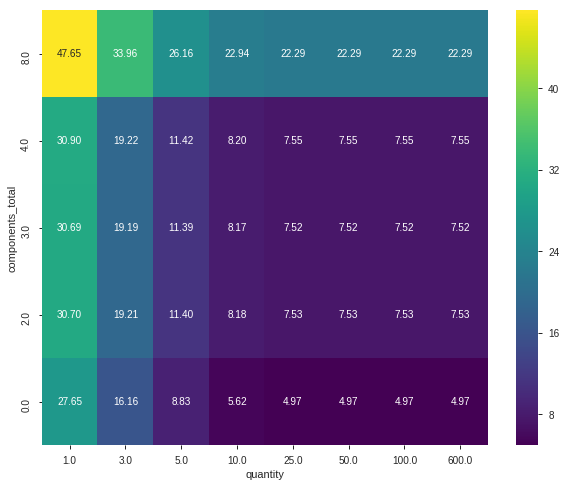

In [155]:
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], 
    index=features[1]
)[::-1] # Slice notation to reverse index order so y axis is ascending

plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
